# Interpreting ResNet Model With LIME

This notebook loads the pretrained ResNet model given by [PaddleClas](https://github.com/PaddlePaddle/PaddleClas/tree/release/2.0) and performs image classification on selected images. 

Interpretations of the predictions are generated and visualized using LIME algorithm, specifically the `LIMECVInterpreter` class.

In [1]:
from PIL import Image
import paddle
import interpretdl as it
from interpretdl.data_processor.readers import read_image
from assets.resnet import ResNet50

In [2]:
import warnings 
warnings.filterwarnings("ignore")

If you have't done so, please first download the pretrained ResNet50 model by runnig the cell below or directly from [this link](https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams). 
More pretrained models can be found in [PaddleClas Model Zoo](https://github.com/PaddlePaddle/PaddleClas/tree/e93711c43512a7ebcec07a0438aa87565df81084#Model_zoo_overview).

In [ ]:
# downloads and the model to assets/
!wget https://paddle-imagenet-models-name.bj.bcebos.com/dygraph/ResNet50_pretrained.pdparams -P assets/

Initialize `paddle_model` and load weights. `ResNet50` is borrowed from PaddleClas [architectures](https://github.com/PaddlePaddle/PaddleClas/tree/e93711c43512a7ebcec07a0438aa87565df81084/ppcls/modeling/architectures).

In [3]:
MODEL_PATH = "assets/ResNet50_pretrained.pdparams"
paddle_model = ResNet50()

state_dict = paddle.load(MODEL_PATH)
paddle_model.set_dict(state_dict)

Initialize the `LIMECVInterpreter`. 

In [4]:
lime = it.LIMECVInterpreter(paddle_model, use_cuda=True)

Before interpreting the image, we first take a look at the original image.

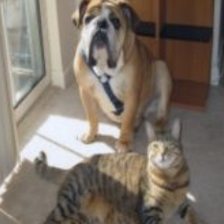

In [5]:
img_path = 'assets/catdog.png'
x = Image.fromarray(read_image(img_path)[0])
x

Then, let LIME method help us `interpret` the image with respect to the predicted label. The most important parts are painted green.

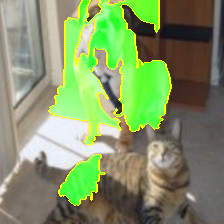

In [6]:
lime_weights = lime.interpret(
    'assets/catdog.png',
    num_samples=2000,
    batch_size=50,
    visual=True,
    save_path=None)

What if we `interpret` the image with respect to label "tiger cat"?

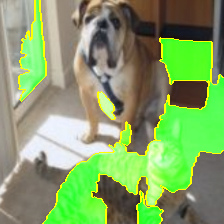

In [7]:
lime_weights = lime.interpret(
    img_path,
    num_samples=2000,
    batch_size=50,
    interpret_class=[282],
    visual=True,
    save_path=None)